(851, 1911)


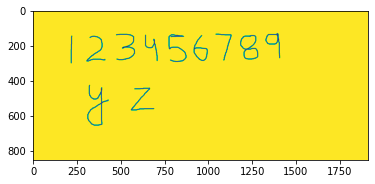

In [ ]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

path_test='rr.png'
test = cv2.imread(path_test,0 )
print(test.shape)
plt.imshow(test)

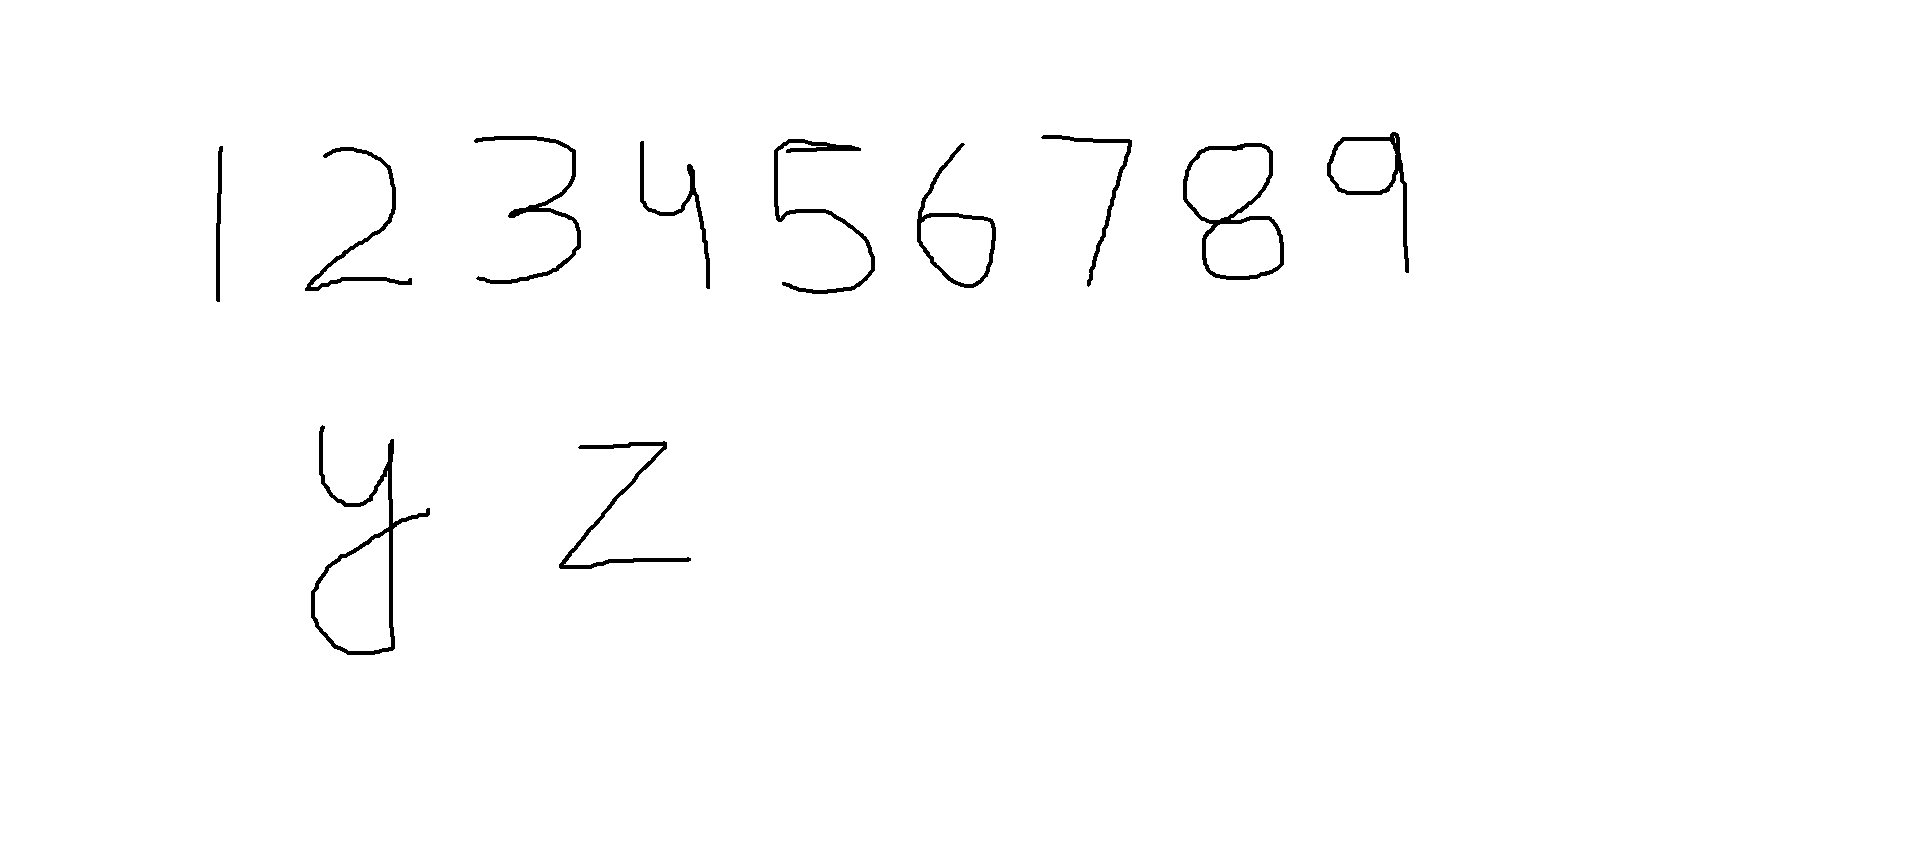

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
img = cv2.imread(path_test,cv2.IMREAD_GRAYSCALE)
#kernel = np.ones((3,3),np.uint8)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
#erosion = cv2.erode(img,kernel,iterations = 3)
#dilation = cv2.dilate(img,kernel,iterations = 1)
#img=dilation
if img is not None:
    #images.append(img)
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    #print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    #print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    #print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    #print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    #print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y-10:y+h+10,x-10:x+w+10]
        

        im_resize = cv2.resize(im_crop,(28,28))
        cv2_imshow(im_resize)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)
        

In [ ]:
train_data = np.array(train_data)
print(train_data.shape)

(11, 28, 28, 1)


In [ ]:
new_model = tf.keras.models.load_model('/content/model2.h5')
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)              

In [ ]:
print(train_data.shape)

(11, 28, 28, 1)


In [ ]:
prediction = new_model.predict(train_data)
print(prediction.shape)

(11, 16)


In [ ]:
prediction[0].shape

(16,)

In [ ]:
print(train_data[0].shape)

(28, 28, 1)


In [ ]:
# 0 == 0
# 1 == 1
# 2 == 2
# 3 == 3
# 4 == 4
# 5 == 5
# 6 == 6
# 7 == 7
# 8 == 8
# 9 == 9
# + == 10
# - == 11
# x(times) == 12
# /,div == 13
# y == 14
# z == 15
class_names = ["0", "1","2","3","4","5","6","7","8","9","+(addition)","-(Subtraction)","X(Multiplication)","/(Division)","y","z"]

In [ ]:
def plot_image(i, predictions_array,  img,true_label):
  true_label, img = true_label, img[i]
  result = 0
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  img = img.reshape(28,28)
  print(type(img))
  plt.imshow(img, cmap="gray")

  predicted_label = np.argmax(predictions_array)
  # print("The predicted label is " + str(predicted_label))
  # print("The true label is " + str(result))
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label
  plt.grid(False)
  plt.xticks(range(16))
  plt.yticks([])
  thisplot = plt.bar(range(16), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

<class 'numpy.ndarray'>


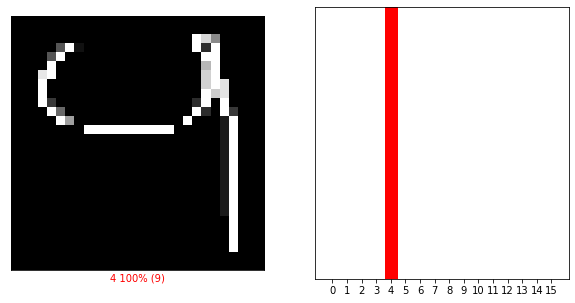

In [ ]:
i = 10
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, prediction[i],  train_data,true_label = 9)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  true_label = 9)
plt.show()

<class 'numpy.ndarray'>


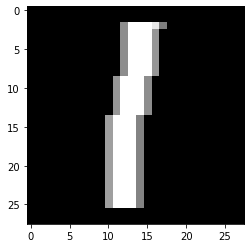

In [ ]:
from google.colab.patches import cv2_imshow
print(type(train_data[0]))
plt.imshow(train_data[0].reshape(28,28),cmap = "gray")

In [ ]:
# 0 == 0
# 1 == 1
# 2 == 2
# 3 == 3
# 4 == 4
# 5 == 5
# 6 == 6
# 7 == 7
# 8 == 8
# 9 == 9
# + == 10
# - == 11
# x(times) == 12
# /,div == 13
# y == 14
# z == 15
class_names = ["0", "1","2","3","4","5","6","7","8","9","+","-","X","/","y","z"]

In [ ]:
predictions = new_model.predict(train_data)
s = ''
# for i in range(train_data.shape[0]):
print(np.argmax(predictions[2]))
result = np.argmax(predictions[2])
if(result==10):
  s=s+'+'
if(result==11):
  s=s+'-'
if(result==12):
  s=s+'*'
if(result==13):
  s=s+'/'
if(result==14):
  s=s+'y' 
if(result==15):
  s=s+'z'          
if(result==0):
  s=s+'0'
if(result==1):
  s=s+'1'
if(result==2):
  s=s+'2'
if(result==3):
  s=s+'3'
if(result==4):
  s=s+'4'
if(result==5):
  s=s+'5'
if(result==6):
  s=s+'6'
if(result==7):
  s=s+'7'
if(result==8):
  s=s+'8'
if(result==9):
  s=s+'9'  
print(s)        

4
4


In [ ]:
predictions[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)